#Info

<span>Work by Maximiliano Iturria</span>

<pre>Content

The Dataset contains features extracted from malicious and non-malicious windows executable files.
I have created this training file using hybrid features (binary hexadecimal + DLL calls) from windows executables.
The file consist of total 373 samples of which 301 are malicious files while rest 72 are non-malicious.
The dataset is imbalanced with malware samples more than regular samples.
There are 531 features represented from F_1 all way to F_531 and a label column stating if the file is malicious or non-malicious.
As representing binary hexadecimal feature names was difficult they have been represented as F_1, F_2,.. and so on, the same applies to DLL calls which are included in it. Some features out of 531 feature can be dropped as they hold very little importance, more to be explored as part of feature engineering.
Column label would hold true value of the executable file if it was a malware or not.
Acknowledgements

The <a href='http://kaggle.com/datasets/piyushrumao/malware-executable-detection'>dataset</a> was been created based on following paper:
Using Two Dimensional Hybrid Feature Dataset to Detect Malicious Executables

Also can be found on UCI here:
UCI Dataset on Malicious Executable Detection
Inspiration

Find out if downloaded executable is a malware, even before installing it which would minimize the harm caused by it to your system or personal files.
I found very few datasets on malware analysis techniques which is the need of our hour, there is more work to be added in the one above for detecting zero day attacks. So I hope you encourage this work.</pre>

In [116]:
from zipfile import ZipFile as zf

with zf('set.zip','r') as zin:
    zin.extractall()

In [117]:
import pandas as pd

df = pd.read_csv('uci_malware_detection.csv')

Checking for NaN

In [118]:
df[df.columns[df.isnull().any()]].isnull().sum()

Series([], dtype: float64)

A bit of Data Science (and visualization) before ML

In [119]:
df.groupby(['Label']).count().transpose().head()

Label,malicious,non-malicious
F_1,301,72
F_2,301,72
F_3,301,72
F_4,301,72
F_5,301,72


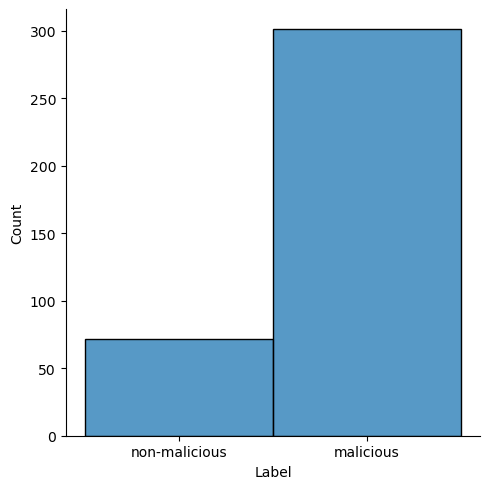

In [120]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.displot(df['Label'])

<p>As seen in the previous graph, we are dealing with imbalanced data.</p>
<p>One way to solve this is by generating new sample points based on the SMOTE algorithm. </p>

In [121]:
# Set our axes
X = df.drop('Label',axis=1)
y = df['Label']

In [122]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to generate new samples
X_resampled, y_resampled = SMOTE(random_state=42).fit_resample(X, y)

# Convert back to pandas DataFrame and Series
df = pd.DataFrame(X_resampled)
label = pd.Series(y_resampled)
df['Label'] = label

C:\Users\W\AppData\Local\Temp\ipykernel_23088\3576597677.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['Label'] = label


In [123]:
df.groupby(['Label']).count().transpose().head()

Label,malicious,non-malicious
F_1,301,301
F_2,301,301
F_3,301,301
F_4,301,301
F_5,301,301


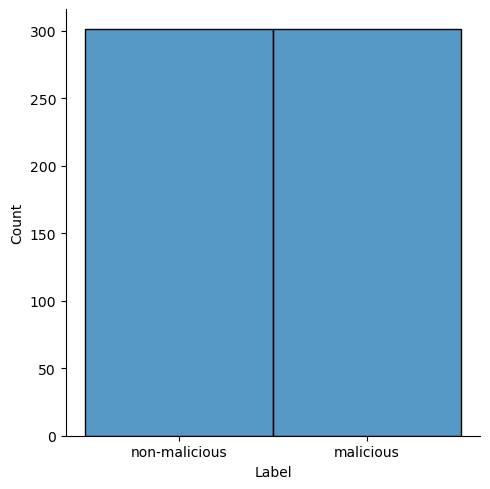

In [124]:
sns.displot(df['Label'])